# Dr. Semmelweis Exploratory Analysis and the Discovery of Handwashing

<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<h3>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. </h3>

<p>If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. </p>

<p>He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>

<p>In this analysis, we're going to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


### Notice the alarming number of deaths

<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846.</p>

<p>You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>

<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [3]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

In [4]:
# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

# Print out clinic_1
clinic_1.head()

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


If we now plot the proportion of deaths at both Clinic 1 and Clinic 2  we'll see a curious pattern

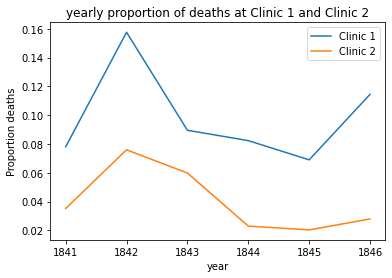

In [6]:
# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x="year", y="proportion_deaths", 
                   label="Clinic 1")
clinic_2.plot(x="year", y="proportion_deaths", 
              label="Clinic 2", ax=ax,
              ylabel="Proportion deaths", 
              title='yearly proportion of deaths at Clinic 1 and Clinic 2')
plt.show()

### Why is the proportion of deaths consistently so much higher in Clinic 1? 

<p>Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2.</p>

<p>While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>

<p>Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever.</p>

In [82]:
prop = yearly.groupby(['year', 'clinic', 'proportion_deaths'])['births', 'deaths'].sum()
prop.head(10)

births  deaths
year clinic   proportion_deaths                
1841 clinic 1 0.078063             3036     237
     clinic 2 0.035217             2442      86
1842 clinic 1 0.157591             3287     518
     clinic 2 0.075968             2659     202
1843 clinic 1 0.089542             3060     274
     clinic 2 0.059876             2739     164
1844 clinic 1 0.082357             3157     260
     clinic 2 0.023004             2956      68
1845 clinic 1 0.069015             3492     241
     clinic 2 0.020364             3241      66

In [94]:
total_prop = yearly.groupby(['year'])['births', 'deaths'].sum()
total_prop['death_proportion'] = round(total_prop['deaths'] / total_prop['births'] * 100, 2)
total_prop

,births,deaths,death_proportion
year,,,
1841,5478,323,5.90
1842,5946,720,12.11
1843,5799,438,7.55
1844,6113,328,5.37
1845,6733,307,4.56
1846,7764,564,7.26


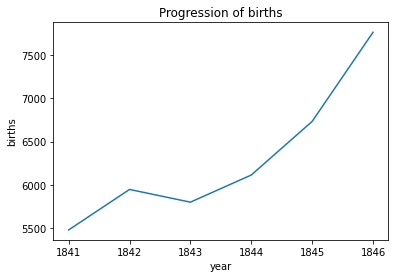

In [101]:
sns.lineplot(x=total_prop.index, y=total_prop['births'])
plt.title('Progression of births');

The total birth at the Vienna General Hospital kept increasing yearly but reduced slightly in 1842 before it kept increasing again

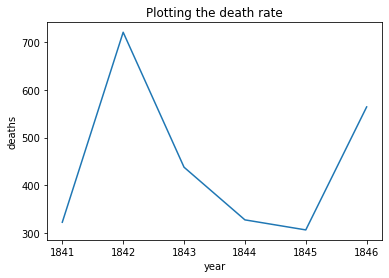

In [110]:
sns.lineplot(x=total_prop.index, y=total_prop['deaths'])
plt.title('Plotting the death rate');

Between 1841 and 1846, the highest death was recorded in 1842 while the lowest death was recored in 1845.

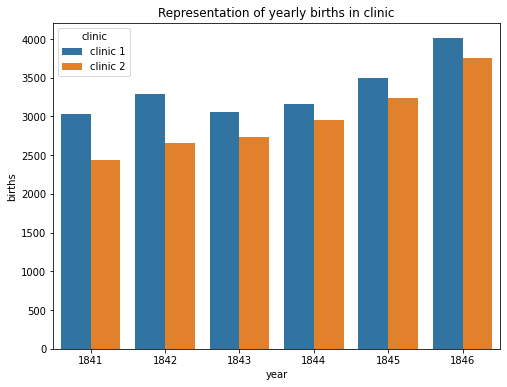

In [66]:
plt.figure(figsize=(8,6))
sns.barplot(x='year', y='births', data=yearly, hue='clinic')
plt.title('Representation of yearly births in clinic');

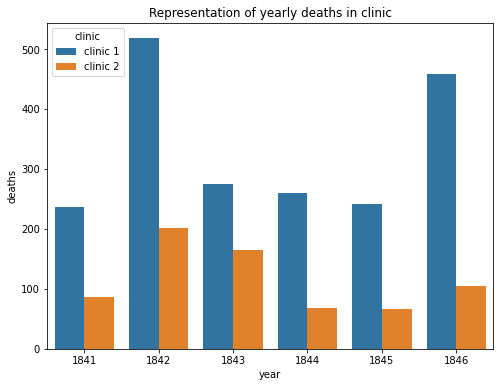

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(x='year', y='deaths', data=yearly, hue='clinic')
plt.title('Representation of yearly deaths in clinic');

<p>So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>

<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [7]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [8]:
# getting indepth information about the dataset
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               98 non-null     datetime64[ns]
 1   births             98 non-null     int64         
 2   deaths             98 non-null     int64         
 3   proportion_deaths  98 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 KB


### The effect of handwashing

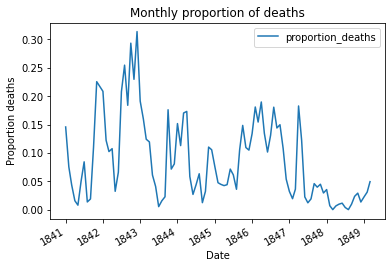

In [11]:
# Plot monthly proportion of deaths
ax = monthly.plot(x='date', y='proportion_deaths',xlabel='Date',
                  ylabel='Proportion deaths', title='Monthly proportion of deaths')

With the data loaded we can now look at the proportion of deaths over time. 

In the plot above we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!

### The effect of handwashing highlighted

<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>

<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

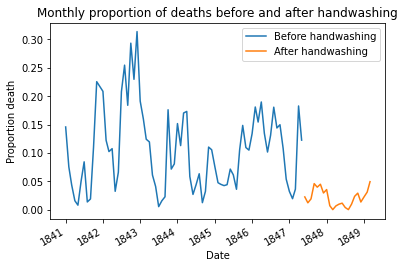

In [16]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='proportion_deaths', 
                         label='Before handwashing')
after_washing.plot(x='date', y='proportion_deaths', 
                         label='After handwashing', ax=ax,
                   xlabel='Date', ylabel='Proportion death', 
                   title='Monthly proportion of deaths before and after handwashing')
plt.show()

### Notice that more handwashing resulted to fewer deaths

<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [35]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = round((before_washing['proportion_deaths'].mean() * 100), 1)
after_proportion = round((after_washing['proportion_deaths'].mean() * 100), 1)
mean_diff = (before_proportion - after_proportion)


display(f'The monthly death proportion before the introduction of handwashing is {before_proportion}')
display(f'The monthly death proportion after the introduction of handwashing is {after_proportion}')
f'The mean difference is {mean_diff}'


'The monthly death proportion before the introduction of handwashing is 10.5'

'The monthly death proportion after the introduction of handwashing is 2.1'

'The mean difference is 8.4'

### A Bootstrap analysis of Semmelweis handwashing data

<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). </p>

<p>To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).</p>

In [38]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_washing['proportion_deaths'].sample(frac=1, replace=True)
    boot_after = after_washing['proportion_deaths'].sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101446
0.975   -0.067525
dtype: float64

<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>

### The fate of Dr. Semmelweis

<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists.</p>

<p>The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>

<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s.</p>

<p>Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>

### In summary

The data Semmelweis collected points to the fact that doctors should wash their hands